# Applied Linear Algebra - Lab 3
Ferdowsi University of Mashhad - Computer Engineering Department

Spring 2022

### Table of Contents

* [Projection matrices and least squares](#sec1)
    * [Exercise 1](#sec2)
* [QR Decomposition](#sec3)
    * [Exercise 2](#sec4)
* [Predicting Car prices](#sec5)
    * [Exercise 3](#sec6)
    * [Exercise 4](#sec7)
* [Polynomial Regression](#sec8)
    * [Exercise 5](#sec9)
* [Predicting Car prices using Polynomial Regression](#sec10)
    * [Exercise 6](#sec11)


* [Optional Excersice](#sec12)

# Projection matrices and least squares <a class="anchor" id="sec1"></a>

### Least square approximation
A crucial application of least squares is fitting a straight line to $m$ points.

Consider five points in the plane: 

$$ (x_i, y_{i}) = (1, 3), (3, 5), (4, 10) , (6, 12), (7, 14) $$

- Find the closest line to these five points.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

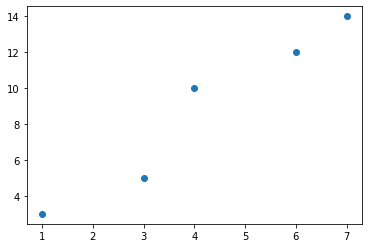

In [2]:
x = np.array([[1], [3], [4], [6], [7]]) 
y = np.array([[3], [5], [10], [12], [14]]) 
plt.scatter(x, y)
plt.show()

- No straight line $ y = \theta_0 + \theta_1 x  $ goes through these five points. 
- We are looking for numbers $\theta_0$ and $\theta_1 $that satisfy five equations:
     
$$ (x_1 = 1) \;\;\;\; y_1 = \theta_0 + 1\theta_1 = 3 $$
     
$$ (x_2 = 3) \;\;\;\; y_2 = \theta_0 + 2\theta_1 = 5 $$
     
$$ (x_3 = 4) \;\;\;\; y_3 = \theta_0 + 4\theta_1 = 10 $$

$$ (x_4 = 6) \;\;\;\; y_4 = \theta_0 + 5\theta_1 = 12 $$

$$ (x_5 = 7) \;\;\;\; y_5 = \theta_0 + 7\theta_1 = 14 $$
    
    
- This 5 by 2 system has no solution, $ y = (3, 5, 10, 12, 14) $ is not a combination of the columns of $X$.

$$X = \begin {bmatrix} 1 & 1 \\ 1 & 3 \\ 1 & 4\\ 1 & 6 \\ 1 & 7  \end{bmatrix} \;\;\;\; \theta = \begin {bmatrix} \theta_0 \\ \theta_1 \end{bmatrix} \;\;\;\; y = \begin {bmatrix} 3 \\ 5 \\ 10\\ 12 \\14 \end{bmatrix} \;\;\;\; X \theta = y \;\; \text{is not solvable} $$



#### Minimizing the Error

- Now that we cannot fit a line that goes through all five points, we try to find the best line $(\hat{\theta})$ for the five points and minimize the overall error, the error is 
    $ | e |^2 = | y - X\hat{\theta} |^2 $
    
- In order to minimize the error, we look for the closest point to $y$ that is in the column space of $X$, the nearest point is $p$ (the projection of $b$ into $A$.)

- Every vector $b$ splits into two parts, The part in the column space is $p$. and The perpendicular part is $e. \; (y = p + e) $

- We can find $\hat{\theta}$ (best fitting line) by solving the equation $ X^T X  \hat{\theta} = X^T y$

$$ \hat{\theta} = \begin {bmatrix} \hat{\theta_0} \\ \hat{\theta_1} \end{bmatrix} \;\;\;\;\;\;\; \hat{\theta} =  (X^T X)^{-1} X^T y $$ 


## Exercise 1 <a class="anchor" id="sec2"></a>


In [3]:
X = np.array([[1, 1], [1, 3], [1, 4], [1, 6], [1, 7]]) 
y = np.array([[3], [5], [10], [12], [14]]) 

**Question 1:** calculate $\hat{\theta}$ for the given data points.

In [4]:
from numpy.linalg import inv
theta_hat = inv(X.T @ (X)) @ X.T @ y # SOLUTION 
print(theta_hat)

[[0.84210526]
 [1.89473684]]


so the best line that minimizes the overall error is 

$$h(x_i) = \hat{\theta_0} + \hat{\theta_1} \times x_i = 0.842 + 1.894 \times x_i \;\;\;\;\;\text{(this is the hypothesis function)} \;\; \text{and} \;\;  h = X \hat{\theta} $$

**Question 2:** calculate $h$ (matrix of predicted $y$):

In [5]:
h = X @ theta_hat # SOLUTION
print(h)
#h[0], h[1], h[2], h[3] and h[4] are predicted points for y0, y1, y2, y3 and y4 

[[ 2.73684211]
 [ 6.52631579]
 [ 8.42105263]
 [12.21052632]
 [14.10526316]]


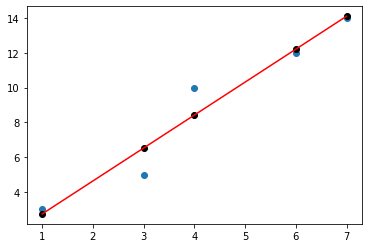

In [6]:
plt.scatter(x, y)
plt.scatter(x, h, color = 'black')
plt.plot(x, h, color = 'red')
plt.show()
#red line is the best line for that five points

A problem with this approach is the matrix inverse that is both computationally expensive and numerically unstable. An alternative approach is to use a matrix decomposition to avoid this operation. We will look at QR decomposition in the following section.

# QR Decomposition <a class="anchor" id="sec3"></a>

- The QR decomposition (also called the QR factorization) of a matrix is a decomposition of the matrix into an orthogonal matrix and a triangular matrix. 
$$ A = QR $$
where $Q$ is an orthogonal matrix ($Q^T Q = I$) and $R$ is an upper triangular matrix. 
- $Q$ is a $m*n$ matrix and $R$ is an upper triangle matrix with the size $n * n$

An Orthogonal Matrix $Q$ with orthonormal columns satisfies $ Q^T Q = I$ :

$$Q^T Q = \begin {bmatrix}  & q_1^T & \\  & q_2^T  & \\ & q_3^T & \end{bmatrix} \begin {bmatrix}  &  & \\ q_1 & q_2 & q_3 \\ & & \end{bmatrix} = 
\begin {bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} = I $$ 
There are several methods for computing the QR decomposition. One of such method is the Gram-Schmidt process.

### The Gram-Schmidt Process 

Start with the independent columns of $A$: $a_1, a_2, ..., a_n$. We want to construct orthogonal vectors $u_1, u_2, ..., u_n$. Then we divide $u_1, u_2, ..., u_n$ by their lengths.

That produces orthonormal vectors $q_1 = \frac{u_1}{||u_1||}, q_2 = \frac{u_2}{||u_2||}, ..., q_n = \frac{u_n}{||u_n||} $

Begin by choosing $u_1 = a_1$. This first direction is accepted as it comes.
The next direction $u_2$ must be perpendicular to $u_1$. Start with $a_2$ and subtract its projection along $u_1$. This leaves the perpendicular part, which is the orthogonal vector $u_2$:

$$
\text{proj}_{v} (u) = \text{projection of $u$ onto $v$} = \frac{v^T . u}{v^T . v} . v 
$$

When vector $u$ is projected onto a vector $v$, its projection $w$ is the part of $u$ along that vector $v$.

<img src="projection_line.png" width="400" height="200">


$$
\text{First Gram-Schmidt step} \;\;\;\;\;\;\;\; u_2 = a_2 - proj_{u_1} (a_2)
$$

so now $u_1$ and $u_2$ are orthogonal.
The third direction starts with $a_3$. This is not a combination of $u_1$ and $u_2$ (because $a_3$ is not a combination of $a_1$ and $a_2$). But most likely $a_3$ is not perpendicular to $u_1$ and $u_2$. So subtract off its components in those two directions to get a perpendicular direction $u_3$:

$$
\text{Next Gram-Schmidt step} \;\;\;\;\;\;\;\; u_3 = a_3 - proj_{u_1} (a_3) - proj_{u_2} (a_3).
$$

This is the idea of the Gram-Schmidt process. Subtract from every new
vector its projections in the directions already set. That idea is repeated at every step.
For the fourth vector $a_4$, we would subtract three projections onto $u_1, u_2, u_3$ to get $u_4$.

$$u_x = a_x - \sum_{i=1}^{x-1} proj_{u_i} (a_x) \;\;\;\;\; \text{ for x = 1, ..., n}$$

At the end, or immediately when each one is found, divide the orthogonal vectors $u_1, u_2, ..., u_n$ by their lengths. The resulting vectors $q_1, q_2, ..., q_n$ are orthonormal.

$$q_x = \frac{u_x}{||u_x||} \;\;\;\;\; \text{ for x = 1, ..., n}$$


$$Q = \begin {bmatrix} q_1 \;|\; q_2 \;|\; ... \;|\; q_n\end{bmatrix} \;\;\; \text{q's are columns of Q}$$

We started with a matrix $A$ and ended up with a matrix $Q$. How are those matrices related? matrix $R$ connects them, $A = QR$

For a $3$by $3$ matrix A: 
$$ A = \begin {bmatrix}  &  & \\ a_1 & a_2  & a_3 \\ & & \end{bmatrix} 
= QR
= \begin {bmatrix}  &  & \\ q_1 & q_2 & q_3 \\ & & \end{bmatrix} 
\begin {bmatrix} q_1^T a_1 & q_1^T a_2 & q_1^T a_3\\  & q_2^T a_2 & q_2^T a_3 \\ & & q_3^T a_3 \end{bmatrix} $$

## Implementing Gram-Schmidt process 
## Exercise 2 <a class="anchor" id="sec4"></a>
**Question 1:** implement function `proj` which takes 2 vectors $v$ and $u$ and returns projection of v onto u.


In [7]:
def proj(v, u):
    result = ((u.T@v)/(u.T@u))*u # SOLUTION  
    return result 

**Question 2:** implement the function `qr_gram_schmidt` which takes the matrix $A$ and returns the $Q$ and $R$ using gram schmidt process.

In [8]:
def qr_gram_schmidt(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    
    for i in range(n):
        u = A[:,i] # SOLUTION 
        for j in range(i):
            u = u - proj(A[:, i], Q[:, j]) # SOLUTION 
        
        Q[:, i] = u / np.sqrt(u.T @ u) # SOLUTION 
    
    
    # Q.T @ Q = I ---> left inverse of Q = Q.T
    # A = QR
    # R = ? 
    
    R = Q.T @ A # SOLUTION 
    
    return Q, R

## Numerical Stability of Gram-schmidt:
When this process is implemented on a computer, the vectors $u_k$ are often not quite orthogonal, due to rounding errors. For the Gram-Schmidt process as described above (sometimes referred to as "classiscal gram-schmidt") this loss of orthogonality is particulary bad; therefore, it is said that the (Classical) Gram-schmidt process is numerically unstable.

The gram-schmidt process can be stabilized by a small modification; this version is sometimes referred to as **modified Gram-schmidt** or MGS. This approach gives same result as the original formula in exact arithmetic and introduces smaller erros in finite-percision arithmetic. Instead of computing the vector $u_k$ as :
$$
u_k = a_k - proj_{u_1} (a_k) - proj_{u_2} (a_k) - ... - proj_{u_{k-1}} (a_k)
$$

it is computed as:
$$
u_k^{(1)} = a_k - proj_{u_1} (a_k) \\
u_k^{(2)} = u_k^{(1)} - proj_{u_2} (u_k^{(1)}) \\
u_k^{(3)} = u_k^{(2)} - proj_{u_3} (u_k^{(2)}) \\
...\\
u_k^{(k-1)} = u_k^{(k-2)} - proj_{u_{k-1}} (u_k^{(k-2)})\\
q_k = \frac{u_k^{(k-1)}}{||u_k^{(k-1)}||}
$$
If you consider the strategy from a block wise point of view, then you’ll notice that you orthogonalize each of your vectors in each step based on your previous orthogonalisation. This does not happen in the classical Gram-Schmidt version but allows you to correct for errors that happened in previous blocks.

## Implementing Modified Gram-schmidt

**Question 3:** implement the function `modified_gram_schmidt` which takes the matrix $A$ and returns the $Q$ and $R$ using the modified version of gram schmidt process.

In [9]:
def modified_gram_schmidt(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    
    for i in range(n):
        u = A[:,i] # SOLUTION  
        for j in range(i):
            u = u - proj(u, Q[:, j]) # SOLUTION 
        
        Q[:, i] = u / np.sqrt(u.T @ u) # SOLUTION 
    
    
    # Q.T @ Q = I ---> left inverse of Q = Q.T
    # A = QR
    # R = ? 
    
    R = Q.T @ A # SOLUTION 
    
    return Q, R

## Classical vs Modified Gram-Schmidt:

now lets compare numerical stability of classical and modified version of gram schmidt process. 
if we take matrix $H$ and decompose it to $Q \text{ and }R$, since $Q$ is orthogonal $Q^T . Q = I$. we can use this fact in the steps below to compare classical and modified versions of gram schmidt:

- build a matrix $H_{n \times n}$.
- compute two versions of $Q$ and $R$ using two different versions of gram schmidt.
- compute the error of both versions, error is the norm of $I - Q^T \;.\; Q$ (in a perfect setting the error should be 0)
- plot the error for both verions.

Matrix $H$ is the [Hilbert matrix](https://en.wikipedia.org/wiki/Hilbert_matrix).

since QR decomposition is computationally expensive, we repeat the steps above only for matrices with sizes $2^n \times 2^n$ for $n=1, 2, ..., 10$.

First lets write a function that builds the Hilbert matrix.

**Question 4**: implement the function `get_hilbert_matrix` which takes the size (`n`) and returns an $n \times n$ Hilbert matrix.  

In [10]:
def get_hilbert_matrix(n):
    out = np.zeros((n, n))  
    for i in range(n):
        for j in range(n):
            out[i][j] = 1/(i+j+1) # SOLUTION  
    return out

**Question 5:** implement the steps of comparing classical and modified gram-schmidt that were mentioned before:

In [11]:
classical_errors = []
modified_errors = []

for power in range(1, 11):
    # build a Hilbert matrix with the size = 2^power
    hilbert_mat = get_hilbert_matrix(2**power)  # SOLUTION  

    identity_matrix = np.identity(2**power) # SOLUTION 
    
    # compute q and r using classical gram schmidt
    q_classical, r_classical = qr_gram_schmidt(hilbert_mat) # SOLUTION 
    
    # compute q and r using modified gram schmidt
    q_mod, r_mod = modified_gram_schmidt(hilbert_mat) # SOLUTION 
    
    error_classical = np.linalg.norm(identity_matrix - q_classical.T @ q_classical, np.inf)
    error_mod = np.linalg.norm(identity_matrix - q_mod.T @ q_mod, np.inf)
    
    classical_errors.append(error_classical)
    modified_errors.append(error_mod)

classic_errors: [1.2361722586587723e-16, 4.057966462855944e-11, 1.0861774863739102, 9.01207058738968, 24.088772358972577, 56.67311401680227, 120.28918679103037, 248.09111958817525, 501.92598013778684, 1016.017737509172] 
 modified_errors:  [1.2361722586587723e-16, 1.2656542480726785e-13, 4.2028932031489083e-07, 1.4626407065543998, 2.945166507110937, 5.583777628271076, 7.799193172284625, 11.570751558654953, 15.853807193296532, 22.231619663410367]


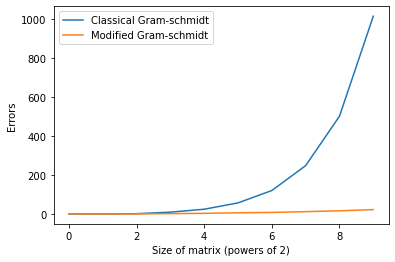

In [12]:
print('classic_errors:', classical_errors, '\n', 'modified_errors: ', modified_errors)
plt.plot(classical_errors, label='Classical Gram-schmidt')
plt.plot(modified_errors, label='Modified Gram-schmidt')
plt.xlabel('Size of matrix (powers of 2)')
plt.ylabel('Errors')
plt.legend()
plt.show()

## Solving the least squares equation via QR decomposition

Using QR decomposition, the coefficients in least square approximation can be found as follows:
$$ \hat{\theta}_{qr} = R^{-1} \; Q^T \; y$$

**Question 6:** calculate $\hat{\theta}_{qr}$ for $X$ and $y$ using QR decomposition and `modified_gram_schmidt` function:

In [13]:
Q, R = modified_gram_schmidt(X) # SOLUTION
theta_hat_qr = inv(R) @ Q.T @ y # SOLUTION
theta_hat_qr

array([[0.84210526],
       [1.89473684]])

Note that we get the same result by using QR decompositon.

# Predicting Car prices <a class="anchor" id="sec5"></a>
Now we want to build a model to perdict car prices using Least square approximation. we use Automobile DataSet. this dataset is pulled from [Automobile Dataset](https://archive.ics.uci.edu/ml/datasets/automobile).

This dataset consist of `horsepower`, `curb-weight`, `engine-size`, `highway-mpg`, `wheel-base` and `length` as **independent variables** and `price` as **dependent variable**.

- horsepower: Horsepower refers to the power an engine produces.
- curb-weight: Curb weight is the weight of the vehicle including a full tank of fuel and all standard equipment. It does not include the weight of any passengers, cargo, or optional equipment. Curb weight is considered the closest weight to the actual weight of the vehicle.
- highway-mpg: the average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed.
- wheel-base: A car's wheelbase is the distance between the centres of the front and rear wheels.

In the previous example (that we tried to fit a line through some points), there was only one independent variable. the hypothesis function we used was as follows:
$$ h(x_i) = \hat{\theta_0} + \hat{\theta_1} x_i : \;\;\;\;
\begin{bmatrix} 1&x_1\\1&x_2\\.&.\\.&.\\1&x_m\end{bmatrix} 
\begin{bmatrix}\hat{\theta_0}\\\hat{\theta_1}\end{bmatrix} 
= \begin{bmatrix} h(x_1)\\h(x_2)\\.\\.\\h(x_m)\end{bmatrix} 
\;\;\;\;\;\; \text{($x_i$ is indepedent variable and $y_i$ is dependent variable)} $$

($h(x_i)$ is the predicted value of $y_i$)

In this dataset we have multiple independent variables, so we use __Multiple linear regression__.


In [14]:
df = pd.read_csv('automobile.csv')
df.head()

,horsepower,curb-weight,engine-size,highway-mpg,wheel-base,length,price
0,111.0,2548,130,27,88.6,0.811148,13495.0
1,154.0,2823,152,26,94.5,0.822681,16500.0
2,102.0,2337,109,30,99.8,0.848630,13950.0
3,115.0,2824,136,22,99.4,0.848630,17450.0
4,110.0,2507,136,25,99.8,0.851994,15250.0


In [15]:
df.shape

(187, 7)

Looking at the shape of dataset, there are $m = 187$ samples and $n = 7$ variables. Target variable is `price`. using multiple linear regression, hypothesis function looks like this:
$$
h(x_i) = horsepower \times \theta_1 + curb\text{-}weight \times \theta_2 + engine\text{-}size \times \theta_3 + highway\text{-}mpg \times \theta_4 + wheel\text{-}base \times \theta_5 + length \times \theta_6 \\
\text{(for the $i^{th}$ sample)}
$$

the $i^{th}$ training example can be represented as:
$$
x_i =  \begin{bmatrix} x_{i_1}&x_{i_2}&...&x_{i_6} \end{bmatrix}=  \begin{bmatrix} horsepower_{1}&curb\text{-}weight_{2}&...&length_{6} \end{bmatrix}
$$

now we combine all training examples into a single input matrix of size $m \times n$:
$$
\mathbf{X}= \left( \begin{smallmatrix} x_{11} & x_{12} &.&.&.&.& x_{1n}\\
                                x_{21} & x_{22} &.&.&.&.& x_{2n}\\
                                x_{31} & x_{32} &.&.&.&.& x_{3n}\\
                                .&.&.&. &.&.&.& \\
                                .&.&.&. &.&.&.& \\
                                x_{m1} & x_{m2} &.&.&.&.&. x_{mn}\\
                                \end{smallmatrix} \right)_{(m,n)}
$$
we represent coefficients of function and dependent variable in vector form as:
$$
\theta = \left (\begin{matrix} \theta_1 \\ \theta_2 \\ .\\.\\ \theta_6 \end {matrix}\right)\; , \;\;
\mathbf{ y } = \left (\begin{matrix} y_1\\ y_2\\. \\. \\ y_i \\. \\. \\ y_m \end{matrix} \right)
$$
So we represent hypothesis function in vectorize form: 
$$\mathbf{ h_\theta{(x)} = X\theta}$$

## Model building

First we have to build the following matrices:
$$h_{(x)} =X\theta \;\; \rightarrow \;\;\;
\begin{bmatrix}
x_{11}&x_{12}&...&x_{16}\\
x_{21}&x_{22}&...&x_{26}\\
.&.&...&.\\
x_{m1}&x_{m2}&...&x_{m6}\\
\end{bmatrix} \;\;
\begin{bmatrix}\theta_1\\\theta_2\\\theta_3\\\theta_4\\\theta_5\\\theta_6\end{bmatrix}
= \begin{bmatrix} h(x_1)\\h(x_2)\\.\\h(x_m)\end{bmatrix} \;\;,\;\; 
\mathbf{ y } = \begin{bmatrix} y_1\\y_2\\.\\y_m\end{bmatrix}
$$

## Exercise 3 <a class="anchor" id="sec6"></a>

**Question 1**: build matrices $X$ and $y$ which were described above:

In [16]:
X = df.drop(['price'], axis=1).to_numpy() # SOLUTION  
y = df['price'].to_numpy() # SOLUTION 
X, y

(array([[1.11000000e+02, 2.54800000e+03, 1.30000000e+02, 2.70000000e+01,
         8.86000000e+01, 8.11148486e-01],
        [1.54000000e+02, 2.82300000e+03, 1.52000000e+02, 2.60000000e+01,
         9.45000000e+01, 8.22681403e-01],
        [1.02000000e+02, 2.33700000e+03, 1.09000000e+02, 3.00000000e+01,
         9.98000000e+01, 8.48630466e-01],
        ...,
        [1.34000000e+02, 3.01200000e+03, 1.73000000e+02, 2.30000000e+01,
         1.09100000e+02, 9.07256127e-01],
        [1.06000000e+02, 3.21700000e+03, 1.45000000e+02, 2.70000000e+01,
         1.09100000e+02, 9.07256127e-01],
        [1.14000000e+02, 3.06200000e+03, 1.41000000e+02, 2.50000000e+01,
         1.09100000e+02, 9.07256127e-01]]),
 array([13495., 16500., 13950., 17450., 15250., 17710., 18920., 23875.,
        16430., 20970., 21105., 24565., 30760., 41315., 36880.,  5151.,
         6295.,  6575.,  5572.,  6377.,  7957.,  6229.,  6692.,  8558.,
         8921., 12964.,  6479.,  6855.,  5399.,  6529.,  7129.,  7295.,
       

## Spliting Data:
in order to evaluate our model, we should split the data into training examples and test examples and use training examples to build the hypothesis function and use test examples to evaluate the model.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)
X_train.shape, X_test.shape

((140, 6), (47, 6))

## Training the Model
we want to build the hypothesis function by finding vector of coefficients ($\theta$), then use it to predict prices. 

as we mentioned before, by using QR decompostion the coefficients can be found as follows:
$$
X = Q . R \\
\theta = R^{-1} . Q^T . y
$$

**Question 2**: calculate $Q$ and $R$ for training examples using the `modified_gram_schmidt` function, then calculate $\theta$ (coefficients of hypothesis function):

In [18]:
Q, R = modified_gram_schmidt(X_train) # SOLUTION 
theta = np.linalg.inv(R) @ Q.T @ y_train # SOLUTION 
print(theta)

[ 2.18469938e+01  4.96955818e+00  9.39906338e+01 -1.59945087e+02
  1.21413917e+02 -2.49908408e+04]


## Prediction from our model
now that we have $\theta$, using hypothesis function we can predict prices:
$$
h(x) = X . \theta
$$

**Question 3:** calculate predicted prices for both training data and testing data:

In [19]:
y_train_pred = X_train @ theta # SOLUTION 
y_test_pred  = X_test @ theta # SOLUTION 

Plotting the predicted prices and actual prices for test data:

Text(0.5, 0, 'Index')

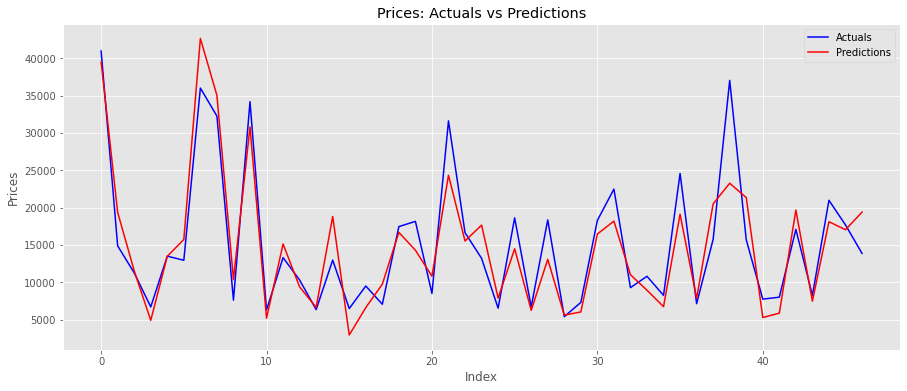

In [20]:
plt.style.use('ggplot')
fig, ax=plt.subplots(figsize=(15,6))
sns.lineplot(x=np.arange(len(y_test)) , y=y_test, label='Actuals',color='blue',ax=ax)
sns.lineplot(x=np.arange(len(y_test)), y=y_test_pred, label='Predictions',color='red',ax=ax)
ax.set_title('Prices: Actuals vs Predictions')
ax.set_ylabel('Prices')
ax.set_xlabel('Index')

## Model Evaluation<a class="anchor" id="sec5_5"></a>

We predicted value for charges by using our model coefficients for test data set. Now we will compare the predicted value with actual value in test set. 

$\mathbf{R^2}$ is statistical measure of how close data are to the fitted regression line. $\mathbf{R^2}$ is always between 0 to 100%. 0% indicates that model explains none of the variability of the response data around it's mean. 100% indicates that model explains all the variablity of the response data around the mean.

$$\mathbf{R^2 = 1 - \frac{SSE}{SST}}$$
**SSE = Sum of Square Error**  
**SST = Sum of Square Total**  
$$\mathbf{SSE = \sum_{i=1}^{m}(h(x_i) - y_i)^2}$$
$$\mathbf{SST = \sum_{i=1}^{m}(h(x_i) - \bar{y}_i)^2} \;\;\; \text{($\mathbf{\bar{y}}$ is mean value of $\mathbf{y}$)}$$

## Exercise 4: <a class="anchor" id="sec7"></a>
**Question 1:** calculate $R^2$ score of testing data using $\mathbf{R^2 = 1 - \frac{SSE}{SST}}$: 

In [21]:
sse_test_data = np.sum((y_test_pred - y_test)**2) # SOLUTION
sst_test_data = np.sum((y_test - y_test.mean())**2) # SOLUTION
R_square_test_data = 1 - (sse_test_data/sst_test_data) # SOLUTION

print(R_square_test_data)

0.8274289755684832


A $R^2$ score above 0.75 for our model is good enough for purpose of this homework and it fits our data test very well.

## Overfitting
A concern with multiple regression is overfitting; with a lot of predictors and a
limited number of samples, random sampling fluctuations will allow some linear
combination of the predictors to match the predictand perfectly over the limited
samples we have, but the correlations will fall apart for a different set of samples.

**Question 2:** we can calculate $R^2$ score of training data set and compare it to $R^2$ score of testing data set and check if overfitting happens:

In [22]:
sse_train_data = np.sum((y_train_pred - y_train)**2) # SOLUTION
sst_train_data = np.sum((y_train - y_train.mean())**2) # SOLUTION
R_square_train_data = 1 - (sse_train_data/sst_train_data) # SOLUTION

print(R_square_train_data)
print(R_square_test_data)

0.7751649231813885
0.8274289755684832


(Difference between $R^2$ score of training and testing data should not be drastic and overfitting should not happen)

# Polynomial Regression: <a class="anchor" id="sec8"></a>
For the linear models, the main idea is to fit a straight line to our data. However, if the data has a quadratic distribution, this time choosing a quadratic function and applying a polynomial transformation may give us better results. This time the hypothesis function is defined as:

$$
h_{\theta} (X) = \theta_0 + \theta_1 \times x + \theta_2 \times x^2 +\;...\;+ \theta_n \times x^n
$$

For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like:
$$
y = \theta_0 + \theta_1 \times x
$$

If we want to fit a parabola to the data instead of a line, we can combine the features in second-order polynomials, so that the model looks like this:
$$
y = \theta_0 + \theta_1 \times x + \theta_2 \times x^2
$$

Note that this is still a linear model: to see this, imagine creating a new set of variables:
$$
z = [x, \; x^2]
$$
With this re-labeling of the data, our problem can be written:

$$
y = \theta_0 + \theta_1 \times z_1 + \theta_2 \times z_2
$$

We see that the resulting polynomial regression is in the same class of linear models we’d considered above and can be solved by the same techniques. By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.

## Exercise 5 <a class="anchor" id="sec9"></a>
### Second order polynomial
Consider these points in two-dimensional space:
$$ (x_i, y_{i}) = (1, 2),  (2, 4),  (3, 7),  (5, 26), (6, 37), (7, 47), (8, 67)$$

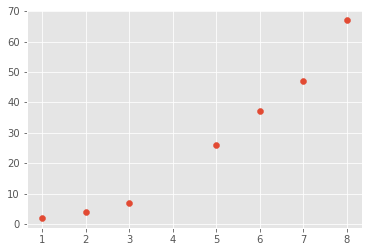

In [23]:
x = np.array([[1], [2], [3], [5], [6], [7], [8]]) 
y = np.array([[2], [4], [7], [26], [37], [47], [67]]) 
plt.scatter(x, y)
plt.show()

using simple regression (fitting straight line) the hypothesis function is:
$$
h(x) = \theta_0 + \theta_1 \times x
$$
as we mentioned above, using second order polynomial regression (fitting parabola) the hypothesis function is:
$$
h(x) = \theta_0 + \theta_1 \times x + \theta_2 \times x^2 
$$
so we need to construct the polynomial feature $x^2$:
$$
X = \begin {bmatrix} 1 & 1 \\ 1 & 2 \\ 1 & 3\\ 1 & 5 \\ 1 & 6 \\ 1 & 7\\ 1 & 8 \end{bmatrix} \;\;\;\; \theta = \begin {bmatrix} \theta_0 \\ \theta_1 \end{bmatrix} \;\;\;\; y = \begin {bmatrix} 2 \\ 4 \\ 7\\ 26 \\37 \\47 \\67 \end{bmatrix} \;\;\;\; X \theta = y \;\;\;\;\;
\xrightarrow[\text{second order Polynomial}]{\text{Constructing polynomial feature ($x^2$)}}
X_{poly} = \begin {bmatrix} 1 & 1 & 1\\ 1 & 2 & 4\\ 1 & 3 & 9\\ 1 & 5 & 25\\ 1 & 6 & 36\\ 1 & 7 & 49\\ 1 & 8 & 64\end{bmatrix} \;\;\;\; \theta_2 = \begin {bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \end{bmatrix} \;\;\;\; y = \begin {bmatrix} 2 \\ 4 \\ 7\\ 26 \\37 \\47 \\67 \end{bmatrix} \;\;\;\; X_{poly} \times \theta_2 = y \;\;\;\;\;
$$


First lets see result of fitting a line through these points:

**Qusetion 1**: using least square approximation, which we explained previously, fit a straight line through these points (simple regression):

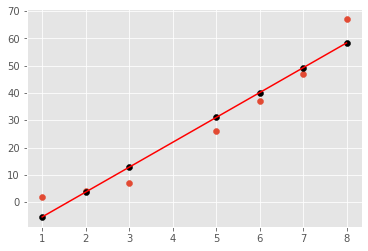

In [24]:
x = np.array([[1, 1], [1, 2], [1, 3], [1, 5], [1, 6], [1, 7], [1, 8]]) 
y = np.array([[2], [4], [7], [26], [37], [47], [67]]) 

theta = np.linalg.inv(x.T @ (x)) @ x.T @ y  # SOLUTION 
# h is the predicted values for x 
h = x @ theta # SOLUTION 

plt.scatter(x[:, 1], y)
plt.scatter(x[:, 1], h, color = 'black')
plt.plot(x[:, 1], h, color = 'red')
plt.show()

Now lets see the result of fitting a parabola.

**Question 2**: using least square approximation, fit a parabola:

(first step is constructing the polynomial features, here the only polynomial feature is $x^2$ and append it to $X_{poly}$)

In [25]:
# construct the polynomial feature x_2
x_2 = (x[:,1]**2).reshape((len(x[:,1]), 1)) # SOLUTION

# Append the polynomial feature to X_poly
x_poly = np.append(x, x_2, axis=1) # SOLUTION 
x_poly

array([[ 1,  1,  1],
       [ 1,  2,  4],
       [ 1,  3,  9],
       [ 1,  5, 25],
       [ 1,  6, 36],
       [ 1,  7, 49],
       [ 1,  8, 64]])

Note that after appending the polynomial feature to $X_{poly}$, we treat the polynomial features($x^2$) like the rest of features($x^0 \text{ and } x$).

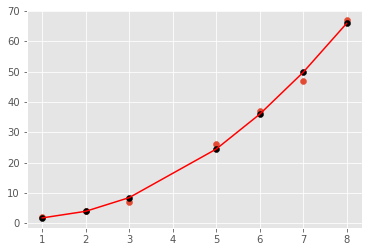

In [26]:
theta2 = np.linalg.inv(x_poly.T @ (x_poly)) @ x_poly.T @ y # SOLUTION 
# h is the predicted values for x (h = X_poly * theta2)
h = x_poly @ theta2 # SOLUTION

plt.scatter(x_poly[:,1], y)
plt.scatter(x_poly[:, 1], h, color = 'black')
plt.plot(x_poly[:, 1], h, color = 'red')
plt.show()

# Predicting Car prices using Polynomial Regression <a class="anchor" id="sec10"></a>
Lets see if we can use polynomial regression in the car price dataset. first plot the [correlation](https://en.wikipedia.org/wiki/Correlation) between dependent and independet variables in dataset:

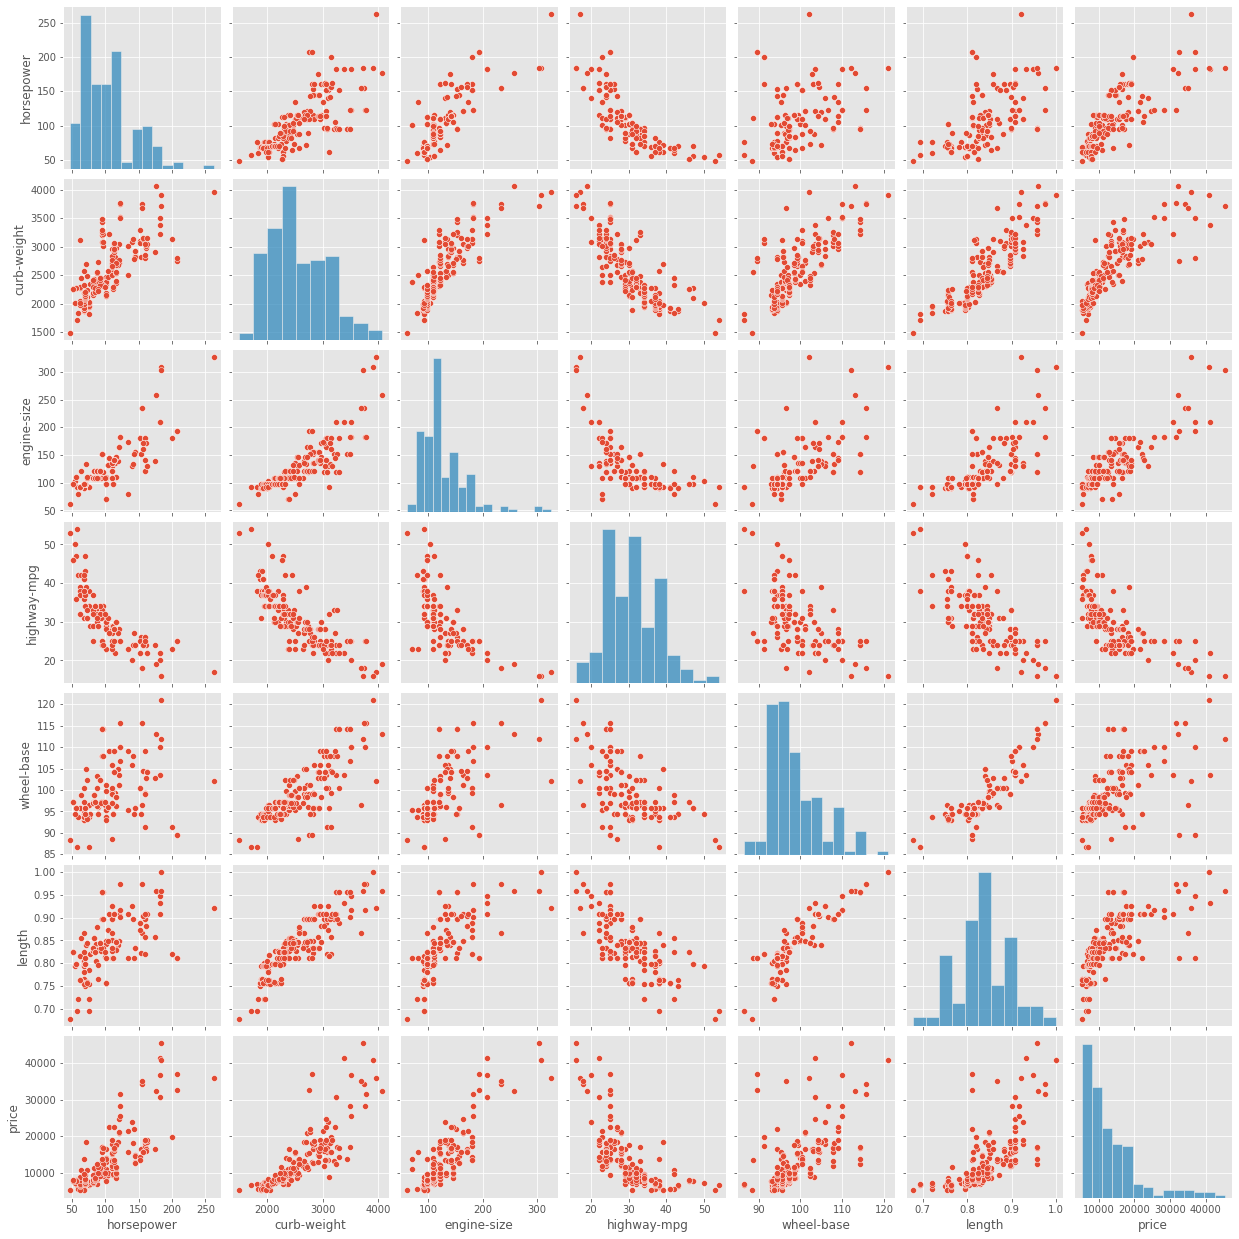

In [27]:
sns.pairplot(df)

We are looking for independent variables that have a polynomial relationship with the dependent variable(`price`).
At first glance, we can see that highway-mpg has a quadratic relationship with price and a parabola can fit in (highway-mpg)-(price) plot. so we add $(highway\text{-}mpg)^2$ to the hypothesis function as a polynomial feature:
$$
h(x_i) = horsepower \times \theta_1 + curb\text{-}weight \times \theta_2 + engine\text{-}size \times \theta_3 + highway\text{-}mpg \times \theta_4 + wheel\text{-}base \times \theta_5 + length \times \theta_6 + highway\text{-}mpg^2 \times \theta_7
$$
and the $i^{th}$ training example can be represented as:
$$
x_i =  \begin{bmatrix} x_{i_1}&x_{i_2}&...&x_{i_6}& x_{i_7} \end{bmatrix}=  \begin{bmatrix} horsepower_{1}&curb\text{-}weight_{2}&...&length_{6} & highway\text{-}mpg^2_{7}\end{bmatrix}
$$

## Exercise 6 <a class="anchor" id="sec11"></a>
predict car prices using polynomial regression and hypothesis function that was descrbed above (only use $highway\text{-}mpg^2$ as a polynomial feature).
- first construct the polynomial featue ($highway\text{-}mpg^2$). then append it to the $X_{poly}$ 
- use least square approximation on $X_{poly}$ and the new hypothesis function.
- at the end compare evaluation result of polynomial regression with multiple regresson from last exercise

In [28]:
df = pd.read_csv('automobile.csv')
df.head()

,horsepower,curb-weight,engine-size,highway-mpg,wheel-base,length,price
0,111.0,2548,130,27,88.6,0.811148,13495.0
1,154.0,2823,152,26,94.5,0.822681,16500.0
2,102.0,2337,109,30,99.8,0.848630,13950.0
3,115.0,2824,136,22,99.4,0.848630,17450.0
4,110.0,2507,136,25,99.8,0.851994,15250.0


#### Construct the polynomial feature

In [29]:
highway_mpg_2 = (df['highway-mpg']**2).to_numpy().reshape((len(df['highway-mpg']), 1)) # SOLUTION  

#### Model building

In [30]:
X_poly = np.append(df.drop(['price'], axis=1).to_numpy(), highway_mpg_2, axis=1) # SOLUTION 
y_poly = df['price'].to_numpy() # SOLUTION 

#### Spliting data

In [31]:
from sklearn.model_selection import train_test_split
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y_poly, test_size=0.25, random_state=11) 
X_poly_train.shape, X_poly_test.shape

((140, 7), (47, 7))

#### Training the model

In [32]:
Q_poly, R_poly = modified_gram_schmidt(X_poly_train) # SOLUTION 
theta_poly = np.linalg.inv(R_poly) @ Q_poly.T @ y_poly_train # SOLUTION 
print(theta_poly)

[ 3.48837645e+01  1.74183803e+00  8.53961320e+01 -1.43183992e+03
  2.17305474e+02 -3.56024620e+03  1.98753262e+01]


#### Predcition from our model

In [33]:
y_poly_train_pred = X_poly_train @ theta_poly # SOLUTION 
y_poly_test_pred  = X_poly_test @ theta_poly # SOLUTION 

### Model evaluation

In [34]:
sse_test_data = np.sum((y_poly_test_pred - y_poly_test)**2) # SOLUTION
sst_test_data = np.sum((y_poly_test - y_poly_test.mean())**2) # SOLUTION
R_square_test_data = 1 - (sse_test_data/sst_test_data) # SOLUTION

sse_train_data = np.sum((y_poly_train_pred - y_poly_train)**2) # SOLUTION
sst_train_data = np.sum((y_poly_train - y_poly_train.mean())**2) # SOLUTION
R_square_train_data = 1 - (sse_train_data/sst_train_data) # SOLUTION

print(R_square_train_data)
print(R_square_test_data)

0.8112711373704621
0.8145983369871874


Text(0.5, 0, 'Index')

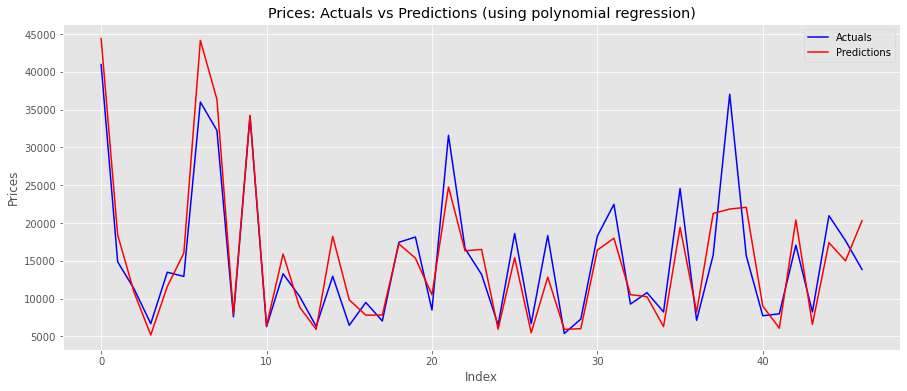

In [35]:
plt.style.use('ggplot')
fig, ax=plt.subplots(figsize=(15,6))
sns.lineplot(x=np.arange(len(y_poly_test)) , y=y_poly_test, label='Actuals',color='blue',ax=ax)
sns.lineplot(x=np.arange(len(y_poly_test)), y=y_poly_test_pred, label='Predictions',color='red',ax=ax)
ax.set_title('Prices: Actuals vs Predictions (using polynomial regression)')
ax.set_ylabel('Prices')
ax.set_xlabel('Index')

## Optional Excersice: <a class="anchor" id="sec12"></a>


students are welcomed to use other regression techniques to improve performance and build a model for this data set that predicts **Prices** more accurately.

> This document was compiled, gathered and coded by the teaching assistant team and may be used only for educational purposes. The authors would like to thank the many projects and educational material that made their source code freely available on the internet, especially otter-grader that made the generation and sanitization of the notebook easier.